# LOGISTIC REGRESSION : <span style='color:orange'> Gradient Descent </span>



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x1 = np.array([2,4,6,8])
y = np.array([0,0,1,1])

In [4]:
x = np.column_stack((np.ones_like(x1),x1))
x

array([[1, 2],
       [1, 4],
       [1, 6],
       [1, 8]])

In [5]:
y = y.reshape(-1,1) # need only one column...no rows

In [6]:
# the hyperparameters
lr = 0.1
steps = 1000
m,n = x.shape
theta = np.zeros((n,1))
cost_list = []

In [8]:
# sigmoid fn
def sigmoid(z):
  z = np.clip(z,-500,500)
  return 1/(1 + np.exp(-z))

In [9]:
# Gradient Descent loop
for i in range(steps):
  z = x @ theta
  h = sigmoid(z)

  gradient = (1/m)*(x.T @ (h-y))
  theta = theta - (lr*gradient)

  # max likelihood -> optimizing the cost fn...cost will decrease.
  eps = 1e-10
  cost = (-1/m) * np.sum((y*np.log(h + eps)) + ((1 - y)*np.log(1-h+eps)))
  cost_list.append(cost)

  print(f'step {i} | theta = {theta.ravel()} | cost = {cost:.3f}')

step 0 | theta = [0.  0.1] | cost = 0.693
step 1 | theta = [-0.01210381  0.12779619] | cost = 0.630
step 2 | theta = [-0.02700593  0.13889935] | cost = 0.623
step 3 | theta = [-0.04275972  0.14470718] | cost = 0.620
step 4 | theta = [-0.05877699  0.14863171] | cost = 0.617
step 5 | theta = [-0.07485312  0.15185562] | cost = 0.614
step 6 | theta = [-0.09091332  0.15481127] | cost = 0.612
step 7 | theta = [-0.10692973  0.15766012] | cost = 0.609
step 8 | theta = [-0.122892  0.160463] | cost = 0.606
step 9 | theta = [-0.13879634  0.16324295] | cost = 0.604
step 10 | theta = [-0.15464142  0.16600875] | cost = 0.601
step 11 | theta = [-0.17042689  0.16876373] | cost = 0.598
step 12 | theta = [-0.18615275  0.17150918] | cost = 0.596
step 13 | theta = [-0.20181913  0.17424561] | cost = 0.593
step 14 | theta = [-0.21742621  0.17697321] | cost = 0.591
step 15 | theta = [-0.23297422  0.17969208] | cost = 0.588
step 16 | theta = [-0.24846336  0.18240226] | cost = 0.586
step 17 | theta = [-0.26389

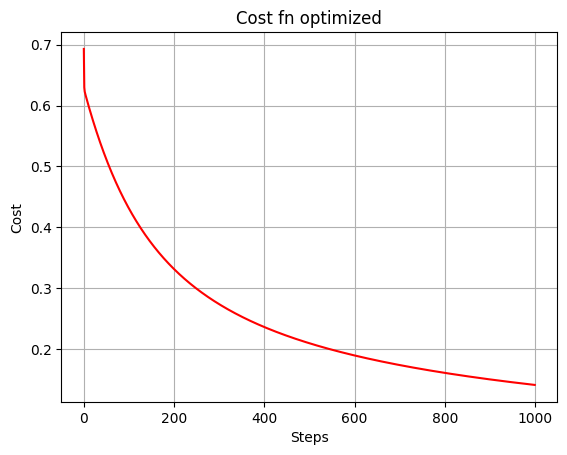

In [27]:
# cost over steps curve
plt.plot(range(steps), cost_list, color = 'red')
plt.xlabel('Steps')
plt.ylabel('Cost')
plt.title('Cost function optimized')
plt.grid(True)
plt.show()

In [10]:
print('✅ final cost : ',cost)
print('✅ theta : ',theta.ravel())

✅ final cost :  0.1410916692216876
✅ theta :  [-5.98319609  1.25521324]


In [11]:
# prediction on training data
train_prob = sigmoid(x @ theta)
train_pred = (train_prob >= 0.5).astype(int)

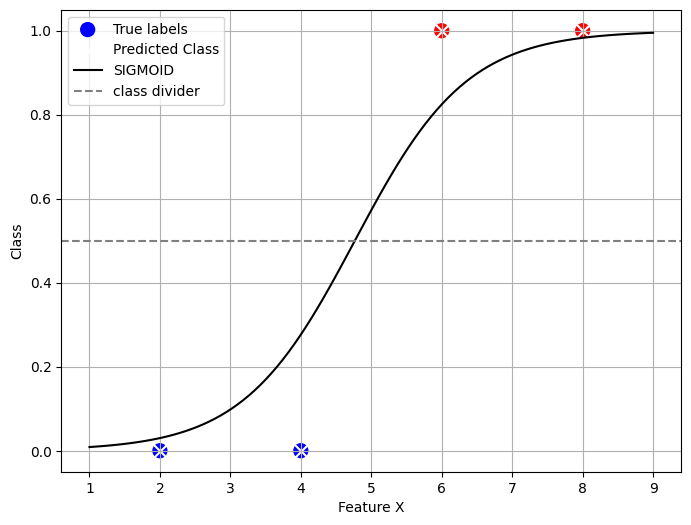

In [15]:
# the plot
plt.figure(figsize = (8,6))

# actual and predicted points
plt.scatter(x1,y.ravel(),c = y.ravel(), cmap = 'bwr', s = 100, label = 'True labels')
plt.scatter(x1,train_pred.ravel(), marker = 'x' ,color = 'white',s = 100, label = 'Predicted Class')

# the sigmoid curve
x_val = np.linspace(1,9,100)
x_plot = np.column_stack((np.ones_like(x_val),x_val))
pred_prob = sigmoid(x_plot @ theta)

plt.plot(x_val, pred_prob, color = 'black', label = 'SIGMOID')

# class divider line
plt.axhline(0.5, label = 'class divider', color = 'grey', linestyle = '--')

# remaining features
plt.xlabel('Feature X')
plt.ylabel('Class')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Evaluation metrics
TP = np.sum((y == 1) & (train_pred == 1))
FN = np.sum((y == 1) & (train_pred == 0))
FP = np.sum((y == 0) & (train_pred == 1))
TN = np.sum((y == 0) & (train_pred == 0))

accuracy = ((TP + TN) / len(y))
precision = (TP / (TP + FP))
recall = (TP / (TP + FN))
f1_score = ((2 * precision * recall) / (precision + recall))

print(f'accuracy = \t{accuracy}')
print(f'precision = \t{precision}')
print(f'recall = \t{recall}')
print(f'f1 = \t\t{f1_score}')

accuracy = 	1.0
precision = 	1.0
recall = 	1.0
f1 = 		1.0
